In [17]:
# Import pandas library
import pandas as pd

# Get the data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Load the dataset using comma as the separator
path = 'user_ratings.csv'
df = pd.read_csv(path, sep=',', names=column_names, header=0)

# Check the head of the data
print(df.head())


   user_id  item_id  rating   timestamp
0       52       34       4  1732887181
1       93       47       2  1721827981
2       15        8       2  1718371981
3       72       40       2  1711632781
4       61       49       2  1718112781


In [15]:
# Check out all the movies and their respective IDs
movie_titles = pd.read_csv('movie_details.csv')
movie_titles.head()


,item_id,title
0,1,Movie 1
1,2,Movie 2
2,3,Movie 3
3,4,Movie 4
4,5,Movie 5


In [18]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()


,user_id,item_id,rating,timestamp,title
0,52,34,4,1732887181,Movie 34
1,24,34,3,1725715981,Movie 34
2,65,34,4,1735651981,Movie 34
3,11,34,4,1730208781,Movie 34
4,38,34,1,1715434381,Movie 34


In [19]:
# Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Movie 6     3.681818
Movie 15    3.545455
Movie 4     3.444444
Movie 39    3.437500
Movie 5     3.421053
Name: rating, dtype: float64

In [20]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Movie 29    31
Movie 40    29
Movie 37    26
Movie 33    26
Movie 17    26
Name: rating, dtype: int64

In [21]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

ratings.head()


,rating,num of ratings
title,,
Movie 1,3.125000,16
Movie 10,2.947368,19
Movie 11,3.375000,24
Movie 12,2.631579,19
Movie 13,2.750000,20


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline


<Axes: >

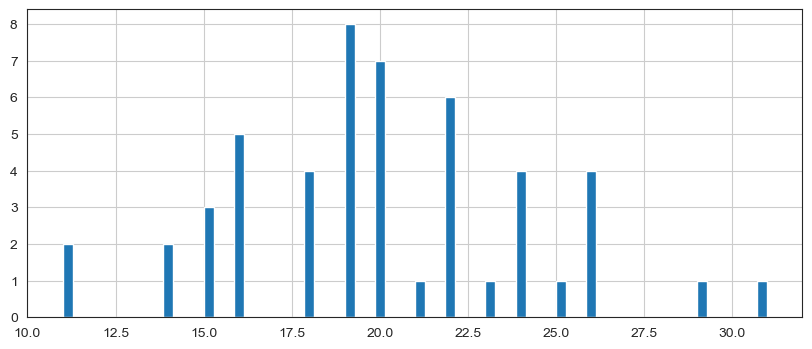

In [24]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 70)


<Axes: >

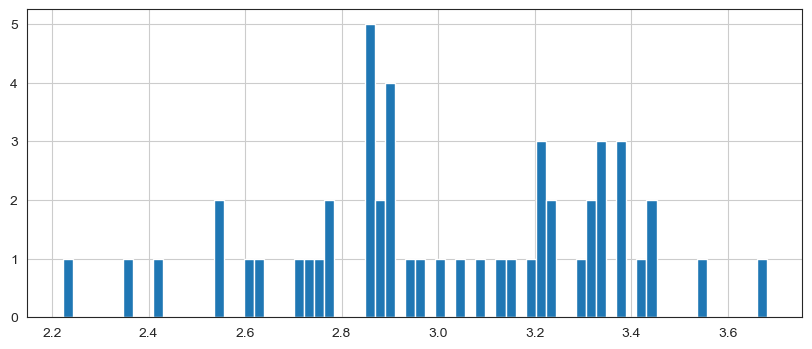

In [25]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))

ratings['rating'].hist(bins = 70)


In [26]:
# Sorting values according to 
# the 'num of rating column'
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)


,rating,num of ratings
title,,
Movie 29,3.387097,31
Movie 40,3.206897,29
Movie 37,3.230769,26
Movie 33,2.769231,26
Movie 17,2.769231,26
Movie 34,3.384615,26
Movie 47,2.960000,25
Movie 30,3.083333,24
Movie 11,3.375000,24
